In [14]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
plt.style.use('dark_background')
import plotly.express as px

track_name: назва пісні 

artist(s)_name: Ім'я виконавця(ів) пісні

artist_count: кількість виконавців, які долучилися до пісні

released_year: рік виходу пісні

released_month: місяць виходу пісні

released_day: день місяця, коли пісня була випущена

in_spotify_playlists: кількість списків відтворення Spotify, до яких включено пісню

in_spotify_charts: присутність і рейтинг пісні в чартах Spotify

потоки: загальна кількість потоків на Spotify

in_apple_playlists: кількість списків відтворення Apple Music, до яких включено пісню

in_apple_charts: присутність і рейтинг пісні в чартах Apple Music

in_deezer_playlists: кількість списків відтворення Deezer, до яких включено пісню


in_deezer_charts: присутність і рейтинг пісні в чартах Deezer

in_shazam_charts: присутність і рейтинг пісні в чартах Shazam

bpm: удари за хвилину, показник темпу пісні

ключ: тональність пісні

режим: режим пісні (мажорний або мінорний)

danceability_%: Відсоток, що вказує на те, наскільки пісня підходить для танців

valence_%: Позитивність музичного змісту пісні

energy_%: сприйнятий рівень енергії пісні

acousticness_%: Рівень акустичного звуку в пісні

instrumentalness_%: кількість інструментального вмісту в пісні

liveness_%: Наявність елементів живого виконання

speakiness_%: кількість вимовлених слів у пісні

In [158]:
df = pd.read_excel('C:/Users/tuf/Downloads/spotify-2023.xlsx')

In [159]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [160]:
df.isna().mean()
#тональність пісні
#в чартах шазама 
#бракує даних

track_name              0.000000
artist(s)_name          0.000000
artist_count            0.000000
released_year           0.000000
released_month          0.000000
released_day            0.000000
in_spotify_playlists    0.000000
in_spotify_charts       0.000000
streams                 0.000000
in_apple_playlists      0.000000
in_apple_charts         0.000000
in_deezer_playlists     0.000000
in_deezer_charts        0.000000
in_shazam_charts        0.052466
bpm                     0.000000
key                     0.099685
mode                    0.000000
danceability_%          0.000000
valence_%               0.000000
energy_%                0.000000
acousticness_%          0.000000
instrumentalness_%      0.000000
liveness_%              0.000000
speechiness_%           0.000000
dtype: float64

1. Завдання полягає в тому, щоб побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань. 

In [161]:
df.groupby('track_name',as_index=False)\
  .agg({'in_spotify_playlists':'sum'})\
  .sort_values('in_spotify_playlists',ascending=False)\
  .head(10).style.background_gradient(cmap='autumn_r')

,track_name,in_spotify_playlists
296,Get Lucky - Radio Edit,52898
517,Mr. Brightside,51979
867,Wake Me Up - Radio Edit,50887
712,Smells Like Teen Spirit - Remastered 2021,49991
784,Take On Me,44927
100,Blinding Lights,43899
563,One Dance,43257
722,Somebody That I Used To Know,42798
256,Everybody Wants To Rule The World,41751
764,Sweet Child O' Mine,41231


In [162]:
top_ten_spotify = df.groupby('track_name',as_index=False)\
                    .agg({'in_spotify_playlists':'sum'})\
                    .sort_values('in_spotify_playlists',ascending=False)\
                    .head(10)

In [163]:
top_ten_spotify

,track_name,in_spotify_playlists
296,Get Lucky - Radio Edit,52898
517,Mr. Brightside,51979
867,Wake Me Up - Radio Edit,50887
712,Smells Like Teen Spirit - Remastered 2021,49991
784,Take On Me,44927
100,Blinding Lights,43899
563,One Dance,43257
722,Somebody That I Used To Know,42798
256,Everybody Wants To Rule The World,41751
764,Sweet Child O' Mine,41231


<Axes: xlabel='track_name', ylabel='in_spotify_playlists'>

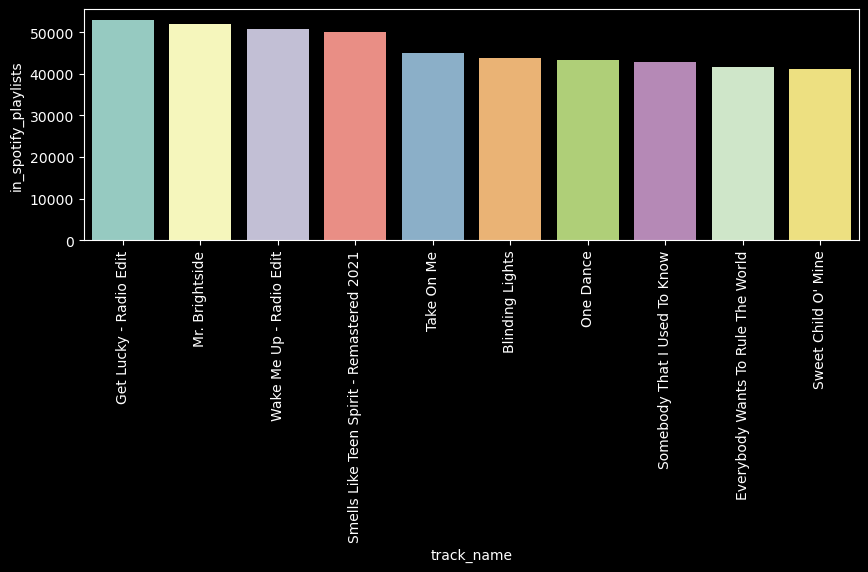

In [164]:
plt.figure(figsize=(10,3))
plt.xticks(rotation=90)
sns.barplot(data = top_ten_spotify, x='track_name',y='in_spotify_playlists')

In [273]:
df.dtypes
# Тут ми можемо побачити, що дані записуються з деякою помилкою, оскільки замість int стоїть тип рядка str і є цифри типу '2,321'.
# Я маю на увазі, що тут повинні стояти 2321, тому наша задача - позбутися непотрібних ком і перевести в потрібний тип.

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int32
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [184]:
df['in_deezer_playlists']  = df.in_deezer_playlists.str.replace(',','').astype(int)

In [167]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [186]:
#df[['in_spotify_playlists','in_apple_playlists','in_deezer_playlists']]
total_top_ten = df[['track_name','in_spotify_playlists','in_apple_playlists','in_deezer_playlists']]


In [187]:
total_top_ten['total_top'] = df.in_spotify_playlists + df.in_apple_playlists + df.in_deezer_playlists

C:\Users\tuf\AppData\Local\Temp\ipykernel_9448\3107079413.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
#total_top_ten[['track_name','total_top']].sort_values('total_top',ascending=False).head(10)

In [173]:
top_ten_spotify

,track_name,in_spotify_playlists
296,Get Lucky - Radio Edit,52898
517,Mr. Brightside,51979
867,Wake Me Up - Radio Edit,50887
712,Smells Like Teen Spirit - Remastered 2021,49991
784,Take On Me,44927
100,Blinding Lights,43899
563,One Dance,43257
722,Somebody That I Used To Know,42798
256,Everybody Wants To Rule The World,41751
764,Sweet Child O' Mine,41231


In [105]:
#як ми можемо побачити, що у загальному рейтингу результати пісень дещо відрізняютьсья 

Розподіл жанрів найпопулярніших пісень: Створіть кругову діаграму або секторну діаграму, яка відображає розподіл жанрів серед найпопулярніших пісень у 2023 році. 

In [ ]:
Через відсутність даних про жанри, ми візьмемо дані про 'танцюючисть'. Візьмемо тільки топ пісень з гарними показниками. Заради експерименту візьмемо тільки декілька значень,
саме в кругову діаграму. Тому що візуально в круговій діаграмі дуже легко загубити суть та буде здаватися, що майже всі куски однакові.

In [126]:
top_densability = df[['track_name','danceability_%']].sort_values('danceability_%',ascending=False)

In [127]:
top_densability

,track_name,danceability_%
595,Peru,96
224,Players,95
250,The Real Slim Shady,95
423,Super Freaky Girl,95
702,Starlight,95
...,...,...
523,Starry Eyes,28
521,Dawn FM,27
387,Lift Me Up - From Black Panther: Wakanda Forev...,25
447,It's the Most Wonderful Time of the Year,24


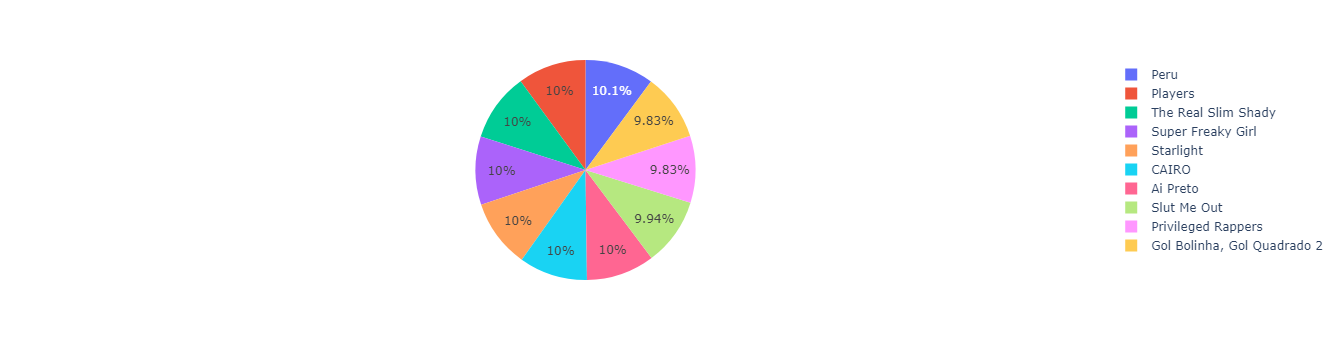

In [128]:
df = top_densability
fig = px.pie(top_densability.head(10), values='danceability_%', names='track_name')
fig.show()


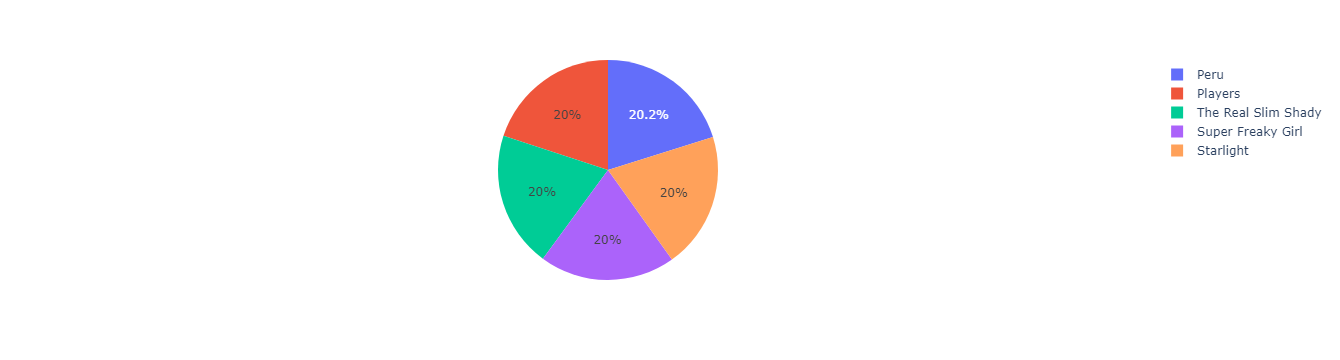

In [129]:
df = top_densability
fig = px.pie(top_densability.head(5), values='danceability_%', names='track_name')
fig.show()


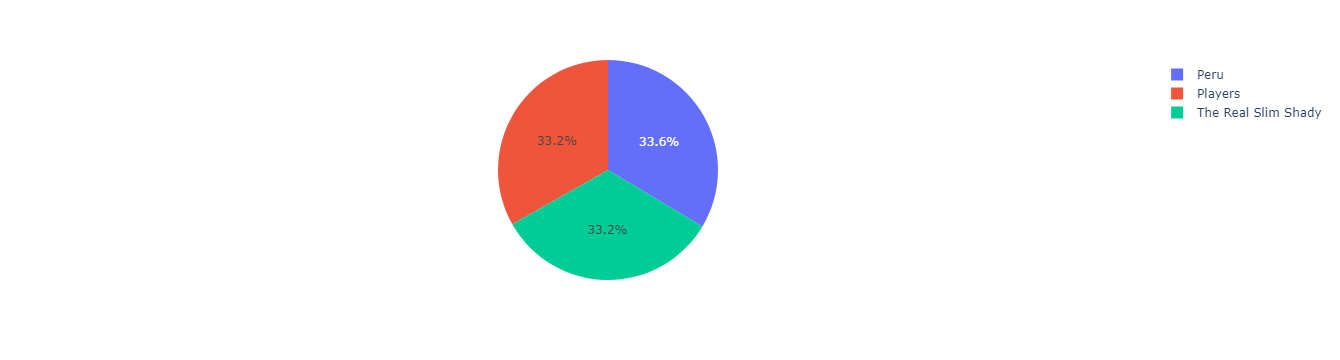

In [130]:
df = top_densability
fig = px.pie(top_densability.head(3), values='danceability_%', names='track_name')
fig.show()


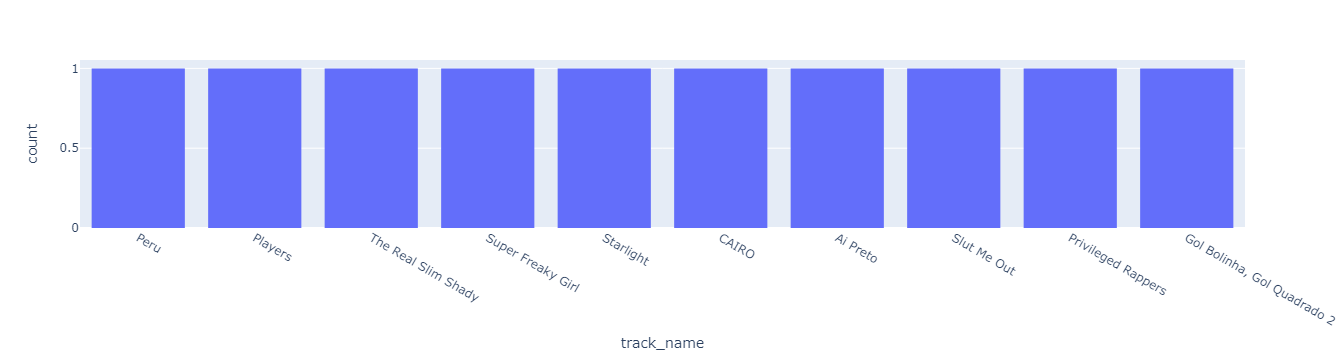

In [136]:
df = top_densability
fig = px.histogram(df.head(10), x='track_name')
fig.show()

In [141]:
top_densability.head(10).style.background_gradient(cmap='autumn_r')
#як не дивно,то топ пісень за рейтингом мають майже однаковий рейтинг 'танцюючості'

,track_name,danceability_%
595,Peru,96
224,Players,95
250,The Real Slim Shady,95
423,Super Freaky Girl,95
702,Starlight,95
321,CAIRO,95
876,Ai Preto,95
268,Slut Me Out,94
943,Privileged Rappers,93
142,"Gol Bolinha, Gol Quadrado 2",93


Динаміка популярності треку в залежності від часу: Побудуйте лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року.

In [ ]:
# "Розглядаючи цей датасет, немає динаміки для кожного треку. Тому я пропоную створити діаграму, щоб визначити, якого року пісні є більш популярними.

# У випадку наявності історії для кожного треку, ми могли б розглянути динаміку не лише топового треку, але й останнього за рейтингом та медіанного. 
# Цілком ймовірно, що ми виявимо якісь закономірності. Наприклад, можливо, трек спочатку був на своєму піку, а потім, як правило, йшов на спад."

In [190]:
total_top_ten['released_year'] = df['released_year']
#додамо роки виходу треків для нашого датасету

C:\Users\tuf\AppData\Local\Temp\ipykernel_9448\3073770488.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [203]:
# візьмемо датасет який ми створили, де зсумованні всі рейтинги за всіма платформами. Як варіант, якщо мова заходила б про аналіз ринку, можна було б проаналізувати 
# тенденцію треків на різних платформах.
top_years = total_top_ten.groupby('released_year',as_index=False).agg({'total_top':'sum'}).sort_values('total_top',ascending=False)


In [199]:
top_years.head(10).style.background_gradient(cmap='autumn_r')

,total_top
released_year,
2022,928273
2021,579928
2019,334297
2013,330095
2017,314881
2020,276123
2016,214448
2023,211337
2014,190560


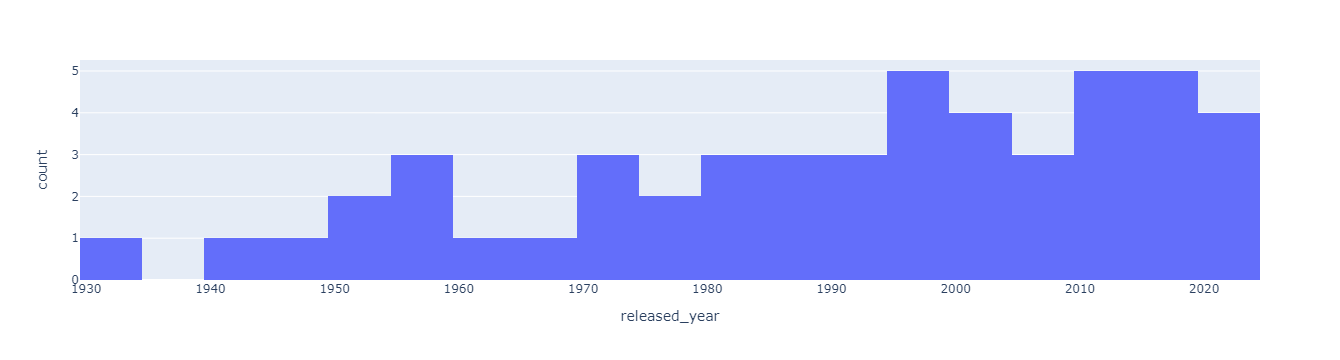

In [204]:
dff = top_years
fig = px.histogram(dff, x="released_year", nbins=20)
fig.show()           

Рейтинг артистів на Spotify: Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів.

In [215]:
total_top_ten['artist_name'] = df['artist(s)_name']

C:\Users\tuf\AppData\Local\Temp\ipykernel_9448\2288959093.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [213]:
total_top_ten.query('.sort_values('total_top',ascending=False)

In [222]:
total_top_ten.query('released_year==2023').sort_values('total_top',ascending=False).artist_name.head(10)

12                             Miley Cyrus
133                      Shakira, Bizarrap
121          Calvin Harris, Ellie Goulding
61               PinkPantheress, Ice Spice
51     David Guetta, Anne-Marie, Coi Leray
34                        Karol G, Shakira
63                Rauw Alejandro, ROSALï¿½
13                           David Kushner
49               Ariana Grande, The Weeknd
4                                Bad Bunny
Name: artist_name, dtype: object

In [233]:
total_top_ten.query('released_year==2023').sort_values('total_top',ascending=False)[['total_top','artist_name']]

,total_top,artist_name
12,13256,Miley Cyrus
133,6097,"Shakira, Bizarrap"
121,5527,"Calvin Harris, Ellie Goulding"
61,5440,"PinkPantheress, Ice Spice"
51,4635,"David Guetta, Anne-Marie, Coi Leray"
...,...,...
193,92,Taylor Swift
104,89,NewJeans
185,74,Shubh
112,64,"Jasiel Nuï¿½ï¿½ez, Peso P"


<Axes: xlabel='artist_name', ylabel='total_top'>

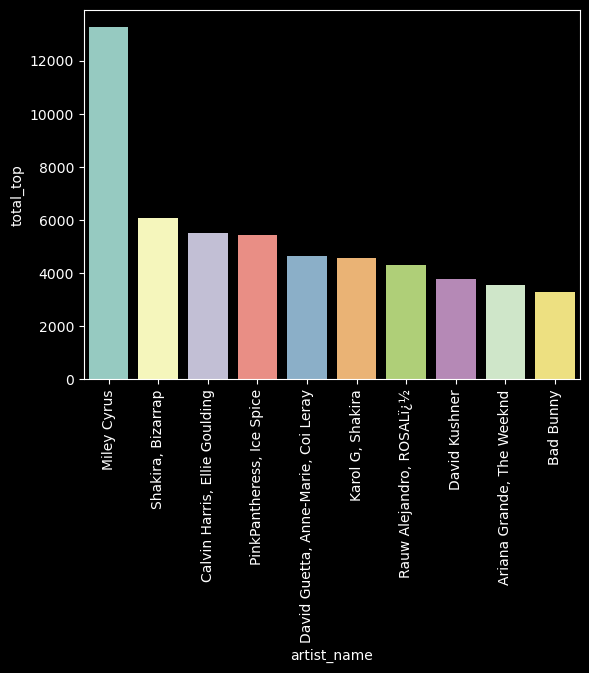

In [241]:
plt.xticks(rotation=90)
sns.barplot(data = (total_top_ten.query('released_year==2023').sort_values('total_top',ascending=False)[['total_top','artist_name']]).head(10), x='artist_name',y='total_top')

 Порівняння популярності трьох треків: Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків 

In [263]:
t = total_top_ten.query('track_name=="My Mind & Me" or track_name== "Cruel Summer" or track_name=="Bigger Than The Whole Sky"' )[['total_top', 'track_name']]

In [264]:
t

,total_top,track_name
3,8099,Cruel Summer
948,1051,My Mind & Me
949,1192,Bigger Than The Whole Sky


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


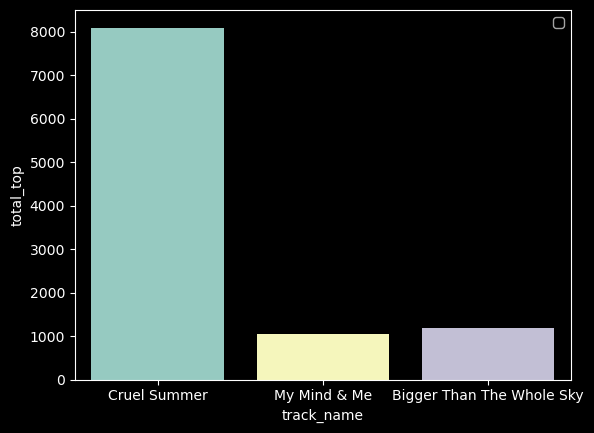

In [272]:
sns.barplot(data = t, x=t.track_name, y = t.total_top)
plt.legend()